# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define a Cost Function

In [2]:
def f(x):
    return x**2

## Algorithm Settings

In [3]:
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

In [4]:
start_interval = [-10, 10]

# Learning rate
lr = 0.01

# Amount to perturb the current point when taking a derivative numerically
h = 0.00001

# Tolerance: stop if the derivative is less than this value
tolerance = 0.0001

# Max iterations
max_iter = 2000

## Random Seeding

If we set a random seed, then the code draws the same random numbers during every run, thus producing the same result for each run.

Without a random seed, the code will draw different random numbers, yielding different results for each run.

In [5]:
# Uncomment the following line to set a random seed,
# where the seed is the argument, 100
# np.random.seed(100)

## Run Algorithm

In [6]:
# Record visited points
xs = np.zeros(max_iter)
ys = np.zeros(max_iter)
derivs = np.zeros(max_iter)

# Randomly select starting point
xcurr = np.random.uniform(*start_interval)
ycurr = f(xcurr)
dcurr = numerical_derivative(f, xcurr, h)

# Iteration counter
iters = np.arange(max_iter)
stop_i = max_iter

for i in iters:    
    # Record current point
    xs[i] = xcurr
    ys[i] = ycurr
    derivs[i] = dcurr
    
    # Stop if the derivative is below the tolerance
    if np.abs(dcurr) < tolerance:
        stop_i = i
        break
    
    dcurr = numerical_derivative(f, xcurr, h)
    xcurr = xcurr - lr*dcurr
    ycurr = f(xcurr)
    
# Drop iterations not completed due to the tolerance condition
iters = iters[:stop_i]
xs = xs[:stop_i]
ys = ys[:stop_i]
derivs = derivs[:stop_i]

In [7]:
# Show final value of x and the stopping iteration
print(f'x:               {xcurr:.4f}\n'
      f'y:               {ycurr:.4f}\n'
      f'Final iteration: {stop_i}')

x:               -0.0001
y:               0.0000
Final iteration: 590


## Plot Results

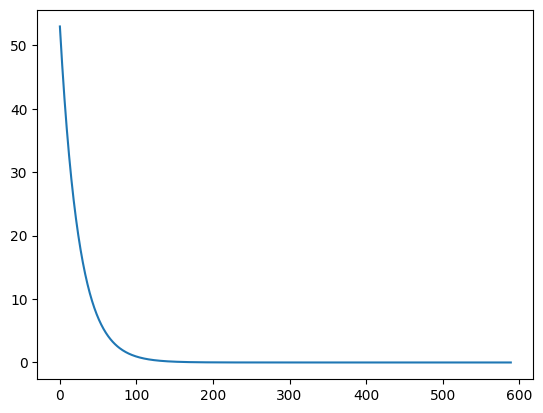

In [8]:
# Plot the evolution of ycurr over the iterations
plt.plot(iters, ys)
plt.show()

In [9]:
# Plot the function and the points that the algorithm visits
plot_max = 2 * max(np.abs(xs))
plot_min = -1 * plot_max
plot_step = 0.01
plot_range = np.arange(plot_min, plot_max, plot_step)

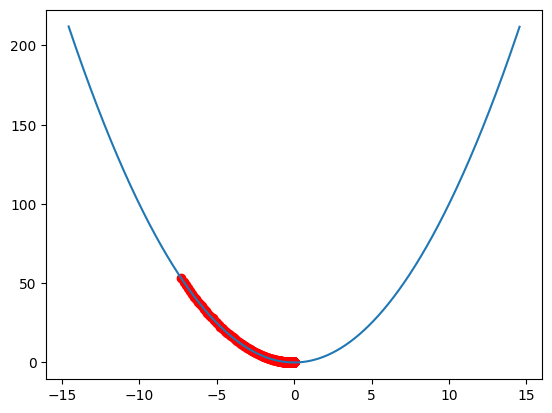

In [10]:
plt.plot(plot_range, [f(x) for x in plot_range])
plt.scatter(xs, ys, color='red')
plt.show()

## Exercise
Try different cost functions and algorithm settings.

The first example function is more complex. Note that it helps to reduce the learning rate to 0.0001 for this example. The function has two local minima: one at x = -3.91 with value -60.66 and another at x = 5.13 with value -227.29. The latter is the global minimum. Does gradient descent always find the global minimum?

The second example does not have a minimum. What happens when you apply gradient descent in the absence of a minimum?

In [11]:
# First example
def f(x):
    return (x**6 / 30 - x**5 / 20
            - x**4 + 3*x + 20)

In [12]:
# Second example
def f(x):
    return -x**2